# DATAMINING

Import danych

# 1.1. Ładowanie datasetu
Dane zostały jebnięte z tego datasetu: https://www.cdc.gov/brfss/annual_data/annual_2020.html

zostały wcześniej przekonwertowane z formatu sas na csv

In [1]:
import pandas as pd

df = pd.read_csv("../data/brfss2020_clean.csv")

In [2]:
df

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_RFPSA23,_CLNSCPY,_SGMSCPY,_SGMS10Y,_RFBLDS4,_STOLDNA,_VIRCOLN,_SBONTIM,_CRCREC1,_AIDTST4
0,1,1,1042020,1,4,2020,1100,2020000001,2020000001,1.0,...,NaN,1.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,1.0
1,1,1,2072020,2,7,2020,1200,2020000002,2020000002,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
2,1,1,1232020,1,23,2020,1100,2020000003,2020000003,1.0,...,NaN,1.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,2.0
3,1,1,1092020,1,9,2020,1100,2020000004,2020000004,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
4,1,1,1042020,1,4,2020,1100,2020000005,2020000005,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401953,72,11,2192021,2,19,2021,1100,2020004940,2020004940,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
401954,72,11,2142021,2,14,2021,1100,2020004941,2020004941,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
401955,72,11,2142021,2,14,2021,1100,2020004942,2020004942,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
401956,72,11,3172021,3,17,2021,1100,2020004943,2020004943,NaN,...,1.0,1.0,3.0,3.0,1.0,3.0,3.0,2.0,1.0,1.0


# 1.2. Inspekcja danych

W tej sekcji przeprowadzono analizę danych tabularycznych z określeniem ich typów, konwersją danych kategorycznych zgodnych z dokumentacją i dostosowaniu ich na potrzebę eksploracji danych.

Dodatkowo przeprowadzono analizę statystyczną danych oraz ich oczyszczenie.

Funkcja `dataframe_summary` zwraca:
- typy
- liczność
- liczbę unikalnych wartości
- liczbę braków
- odsetek braków
- skośność
- kurtozę
- korelację ze zmienną predykcyjną (jeśli podana).

In [3]:
def dataframe_summary(df, pred=None):
    '''
    Zwraca typy, liczność, liczbę unikalnych wartości, liczbę braków, odsetek braków,
    skośność, kurtozę oraz korelację ze zmienną celu (jeśli podana).
    '''
    summary = pd.DataFrame({
        'types': df.dtypes,
        'counts': df.count(),
        'distincts': df.nunique(),
        'nulls': df.isnull().sum(),
        'missing_ratio (%)': (df.isnull().sum() / df.shape[0]) * 100,
        'skewness': df.skew(numeric_only=True),
        'kurtosis': df.kurt(numeric_only=True)
    })

    summary['uniques'] = [df[col].unique() for col in summary.index]

    if pred is not None and pred in df.columns:
        summary[f'corr {pred}'] = df.corr(numeric_only=True)[pred]

    return summary


## Korelacja dla zmiennych predykcyjnych

Dla danych przeprowadzono analizę statystyczną potencjalnych zmiennych 


- `ADDEPEV3` 
    
    Opisuje czy osoba badana kiedykolwiek posiadała zaburzenia depresyjne (w tym depresję, ciężką depresję, dystymię lub lekką depresję)

|Wartość| Znaczenie                         |
| ----- | --------------------------------- |
| 1     | Tak                             |
| 2     | Nie                             |
| 7     | Nie wiem / Nie jestem pewny(-a) |
| 9     | Odmowa odpowiedzi               |


In [4]:
df["ADDEPEV3"].value_counts()

ADDEPEV3
2.0    324035
1.0     75820
7.0      1476
9.0       621
Name: count, dtype: int64

In [5]:
# Zakładamy, że df to BRFSS 2020 po wczytaniu i wstępnym przetworzeniu
# np. df['ADDEPEV3'] = df['ADDEPEV3'].map({1: 1, 2: 0})

# Wygenerowanie podsumowania względem zmiennej celu
summary_ADDEPEV3 = dataframe_summary(df, pred='ADDEPEV3')

summary_ADDEPEV3

,types,counts,distincts,nulls,missing_ratio (%),skewness,kurtosis,uniques,corr ADDEPEV3
_STATE,int64,401958,53,0,0.000000,0.168148,-0.637796,"[1, 2, 4, 5, 6, 8, 9, 10, 11, 12, 13, 15, 16, ...",-0.012670
FMONTH,int64,401958,12,0,0.000000,0.197212,-1.281194,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]",-0.007086
IDATE,int64,401958,439,0,0.000000,0.054446,-1.268195,"[1042020, 2072020, 1232020, 1092020, 1292020, ...",-0.006642
IMONTH,int64,401958,12,0,0.000000,0.054767,-1.263340,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]",-0.006760
IDAY,int64,401958,31,0,0.000000,0.112475,-1.072257,"[4, 7, 23, 9, 29, 30, 5, 18, 20, 8, 27, 15, 6,...",0.005227
...,...,...,...,...,...,...,...,...,...
_STOLDNA,float64,176357,3,225601,56.125516,-3.709040,12.199234,"[3.0, nan, 1.0, 2.0]",0.020666
_VIRCOLN,float64,174274,3,227684,56.643729,-5.402121,28.241651,"[3.0, nan, 1.0, 2.0]",0.020754
_SBONTIM,float64,194217,3,207741,51.682265,-0.299935,-1.544532,"[3.0, 2.0, nan, 1.0]",0.023495
_CRCREC1,float64,175698,3,226260,56.289463,1.424674,0.233231,"[1.0, nan, 2.0, 3.0]",0.030913


- `MENTHLTH`


Zmierzona liczba dni, w których osoba badana odczuwała zły stan zdrowia psychicznego w ciągu ostatnich 30 dni. Pytanie uwzględnia stres, depresję oraz problemy emocjonalne.

| Wartość | Znaczenie                            |
| ------- | ------------------------------------ |
| 0–30  | Liczba dni złego stanu psychicznego  |
| 88    | Brak złych dni                   |
| 77    | Nie wiem / Nie jestem pewny(-a)  |
| 99    | Odmowa odpowiedzi                |
| .     | Brak danych / pytanie nie zadane |


In [6]:
df["MENTHLTH"].value_counts()

MENTHLTH
88.0    255707
30.0     22297
2.0      19591
5.0      16705
10.0     12656
3.0      12500
15.0     12006
1.0      11144
20.0      6544
7.0       6524
4.0       6344
77.0      5833
14.0      2475
25.0      2394
99.0      2091
6.0       1794
8.0       1314
12.0       909
28.0       643
21.0       436
29.0       400
18.0       255
9.0        252
16.0       189
27.0       166
17.0       159
13.0       137
22.0       114
11.0       109
24.0        88
23.0        77
26.0        76
19.0        24
Name: count, dtype: int64

In [7]:
summary_MENTHLTH = dataframe_summary(df, pred='MENTHLTH')

summary_MENTHLTH

,types,counts,distincts,nulls,missing_ratio (%),skewness,kurtosis,uniques,corr MENTHLTH
_STATE,int64,401958,53,0,0.000000,0.168148,-0.637796,"[1, 2, 4, 5, 6, 8, 9, 10, 11, 12, 13, 15, 16, ...",0.010233
FMONTH,int64,401958,12,0,0.000000,0.197212,-1.281194,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]",-0.026440
IDATE,int64,401958,439,0,0.000000,0.054446,-1.268195,"[1042020, 2072020, 1232020, 1092020, 1292020, ...",-0.028757
IMONTH,int64,401958,12,0,0.000000,0.054767,-1.263340,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]",-0.028769
IDAY,int64,401958,31,0,0.000000,0.112475,-1.072257,"[4, 7, 23, 9, 29, 30, 5, 18, 20, 8, 27, 15, 6,...",0.002050
...,...,...,...,...,...,...,...,...,...
_STOLDNA,float64,176357,3,225601,56.125516,-3.709040,12.199234,"[3.0, nan, 1.0, 2.0]",0.013283
_VIRCOLN,float64,174274,3,227684,56.643729,-5.402121,28.241651,"[3.0, nan, 1.0, 2.0]",0.007037
_SBONTIM,float64,194217,3,207741,51.682265,-0.299935,-1.544532,"[3.0, 2.0, nan, 1.0]",0.007470
_CRCREC1,float64,175698,3,226260,56.289463,1.424674,0.233231,"[1.0, nan, 2.0, 3.0]",0.003890


# 1.3. Data cleaning

In [8]:
# additional drop columns
to_drop = [
    "IDATE",
    "DISPCODE",
    "SEQNO",
    "_PSU",
    "_STSTR",
    "_STRWT",
    "_WT2RAKE",
    "_LLCPWT2",
    "_LLCPWT",
]
df = df.drop(columns=to_drop)

Czyszczenie zmiennej `ADDEPEV3` (czy kiedykolwiek zdiagnozowano depresję)

Mapa wartości:


1 = Tak → 1


2 = Nie → 0


7, 9 = brak danych

In [9]:
df = df[df['ADDEPEV3'].isin([1, 2])].copy()


**Czyszczenie zmiennej MENTHLTH (liczba dni złego stanu psychicznego)**



Wartości 77, 99, NaN → brak danych


Wartość 88 = 0 dni (czyli brak złego samopoczucia)

In [10]:
df['MENTHLTH'] = df['MENTHLTH'].replace({77: pd.NA, 99: pd.NA, 88: 0})
df['MENTHLTH'] = pd.to_numeric(df['MENTHLTH'], errors='coerce')

**Klasyfikacja zmiennych na heurystykach z dokumentacji BRFS**

Kategoryzacja kloumn + czyszczenie + encoding + skalowanie + usuwanie


In [11]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

def classify_variables(df):
    binary_vars, nominal_vars, ordinal_vars, continuous_vars, to_drop = [], [], [], [], []

    for col in df.columns:
        if col == 'MENTHLTH':
            continue
        
        vals = set(df[col].dropna().unique())
        nunique = len(vals)
        missing_ratio = df[col].isna().mean()

        if nunique <= 1 or missing_ratio > 0.5:
            to_drop.append(col)
        elif vals.issubset({1, 2, 7, 8, 9}):
            binary_vars.append(col)
        elif nunique <= 15 and pd.api.types.is_integer_dtype(df[col]):
            ordinal_vars.append(col)
        elif nunique <= 15:
            nominal_vars.append(col)
        else:
            continuous_vars.append(col)

    return {
        'binary': binary_vars,
        'ordinal': ordinal_vars,
        'nominal': nominal_vars,
        'continuous': continuous_vars,
        'drop': to_drop
    }

def preprocess_brfss(df):
    df = df.copy()
    
    # Klasyfikacja zmiennych
    classified = classify_variables(df)

    # 1. Usuń kolumny zbyt ubogie lub zbyt brakujące
    df.drop(columns=classified['drop'], inplace=True, errors='ignore')

    # 2. Binarne zmienne: 7/8/9 → NaN, 1→1, 2→0
    for col in classified['binary']:
        df[col] = df[col].replace({7: pd.NA, 8: pd.NA, 9: pd.NA})
        df[col] = df[col].map({1: 1, 2: 0})

    # 3. Porządkowe: 7/8/9 → NaN (można zostawić jako liczby)
    for col in classified['ordinal']:
        df[col] = df[col].replace({7: pd.NA, 8: pd.NA, 9: pd.NA})

    # 4. Nominalne: one-hot encoding
    df = pd.get_dummies(df, columns=classified['nominal'], drop_first=True)

    # # 5. Ciągłe: standaryzacja
    # scaler = StandardScaler()
    # continuous_cols = classified['continuous']
    # df[continuous_cols] = scaler.fit_transform(df[continuous_cols])

    return df, classified


In [12]:
df_cleaned, variable_map = preprocess_brfss(df)
df_cleaned

,_STATE,FMONTH,IMONTH,IDAY,IYEAR,CELLSEX,PVTRESD3,CSTATE1,LANDLINE,HHADULT,...,_RACEPRV_2.0,_RACEPRV_3.0,_RACEPRV_4.0,_RACEPRV_5.0,_RACEPRV_6.0,_RACEPRV_7.0,_RACEPRV_8.0,_BMI5CAT_2.0,_BMI5CAT_3.0,_BMI5CAT_4.0
0,1,1,1,4,2020,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
1,1,1,2,7,2020,NaN,NaN,NaN,NaN,NaN,...,True,False,False,False,False,False,False,False,True,False
2,1,1,1,23,2020,NaN,NaN,NaN,NaN,NaN,...,True,False,False,False,False,False,False,False,False,False
3,1,1,1,9,2020,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
4,1,1,1,4,2020,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401953,72,11,2,19,2021,0.0,1.0,1.0,0.0,4.0,...,False,False,False,False,False,False,True,True,False,False
401954,72,11,2,14,2021,0.0,1.0,1.0,0.0,2.0,...,False,False,False,False,False,False,True,False,False,True
401955,72,11,2,14,2021,0.0,1.0,1.0,0.0,2.0,...,False,False,False,False,False,False,True,False,False,True
401956,72,11,3,17,2021,1.0,1.0,1.0,1.0,2.0,...,False,False,False,False,False,False,True,False,True,False


In [13]:
classified = classify_variables(df)

print("Binarne:", classified['binary'])
print("Porządkowe:", classified['ordinal'])
print("Nominalne:", classified['nominal'])
print("Ciągłe:", classified['continuous'])
print("Do usunięcia:", classified['drop'])

Binarne: ['CELLSEX', 'PVTRESD3', 'CSTATE1', 'LANDLINE', 'SEXVAR', 'HLTHPLN1', 'MEDCOST', 'EXERANY2', 'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3', 'ASTHMA3', 'CHCSCNCR', 'CHCOCNCR', 'CHCCOPD2', 'HAVARTH4', 'ADDEPEV3', 'CHCKDNY2', 'VETERAN3', 'DEAF', 'BLIND', 'DECIDE', 'DIFFWALK', 'DIFFDRES', 'DIFFALON', 'SMOKE100', 'FLUSHOT7', 'SHINGLE2', 'PNEUVAC4', 'HADMAM', 'HADPAP2', 'HPVTEST', 'COLNSCPY', 'SIGMSCPY', 'BLDSTOL1', 'STOOLDNA', 'VIRCOLON', 'HIVTST7', 'HIVRISK5', 'PDIABTST', 'ECIGARET', '_METSTAT', '_URBSTAT', '_CHISPNC', '_DUALUSE', '_RFHLTH', '_HCVU651', '_TOTINDA', '_MICHD', '_LTASTH1', '_CASTHM1', '_DRDXAR2', '_EXTETH3', '_DENVST3', '_HISPANC', '_RACEG21', '_SEX', '_RFBMI5', '_RFSMOK3', 'DRNKANY5', '_RFBING5', '_RFDRHV7', '_RFSEAT2', '_RFSEAT3', '_DRNKDRV', '_AIDTST4']
Porządkowe: ['FMONTH', 'IMONTH', 'IYEAR', 'QSTVER', 'QSTLANG', '_IMPRACE', '_PHYS14D', '_MENT14D', '_ASTHMS1', '_AGEG5YR', '_AGE65YR', '_AGE_G', '_CHLDCNT', '_EDUCAG', '_INCOMG', '_SMOKER3']
Nominalne: ['GENHLTH', 'PERSDOC2', 

Usunięcie danych z pustymi kolumnami (usunięcie kolumn gdzie liczba rekordów stanowi mniej niż 95% próby)

In [14]:
# Ustawienie braków
df['MENTHLTH'] = df['MENTHLTH'].replace({77: pd.NA, 99: pd.NA})
total_menthlth_count = df['MENTHLTH'].notna().sum()

# Progi procentowe
df_non_missing = df[df['MENTHLTH'].notna()]
threshold = 0.9
# Kolumny do usunięcia
cols_to_drop = [
    col for col in df.columns
    if df_non_missing[col].notna().sum() / len(df_non_missing) < threshold
]

# Usunięcie kolumn
df = df.drop(columns=cols_to_drop)



# 1.4. Data visualistion

## Checking outliers

In [15]:
df_plot = df.copy()
df_plot = df_plot.sort_values(by='SEXVAR')
men = df_plot['SEXVAR'].isin([1])
df_plot[men]


,_STATE,FMONTH,IMONTH,IDAY,IYEAR,SEXVAR,GENHLTH,PHYSHLTH,MENTHLTH,HLTHPLN1,...,_RFSMOK3,DRNKANY5,DROCDY3_,_RFBING5,_DRNKWK1,_RFDRHV7,_RFSEAT2,_RFSEAT3,_DRNKDRV,_AIDTST4
183924,27,9,9,13,2020,1,1.0,88.0,0.0,2.0,...,1,2,0,1,0,1,1,1,9,2.0
183923,27,9,10,30,2020,1,1.0,88.0,3.0,1.0,...,1,1,83,1,1167,1,1,1,2,1.0
183922,27,9,10,2,2020,1,4.0,3.0,3.0,2.0,...,1,1,3,2,140,1,9,9,9,NaN
183920,27,9,10,2,2020,1,3.0,88.0,0.0,1.0,...,1,1,7,1,47,1,1,1,2,2.0
183950,27,9,11,6,2020,1,2.0,88.0,1.0,1.0,...,1,1,23,1,327,1,1,1,2,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401934,72,11,3,11,2021,1,3.0,88.0,0.0,1.0,...,1,1,3,1,70,1,1,1,2,1.0
401940,72,11,3,16,2021,1,2.0,88.0,0.0,1.0,...,2,2,0,1,0,1,1,1,9,2.0
401944,72,11,2,15,2021,1,3.0,88.0,0.0,1.0,...,1,2,0,1,0,1,1,1,9,2.0
401945,72,11,3,9,2021,1,3.0,88.0,0.0,1.0,...,1,1,20,2,2100,2,1,1,1,1.0


C:\Users\adamw\AppData\Local\Temp\ipykernel_39576\556993186.py:31: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\adamw\miniforge3\envs\ai\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


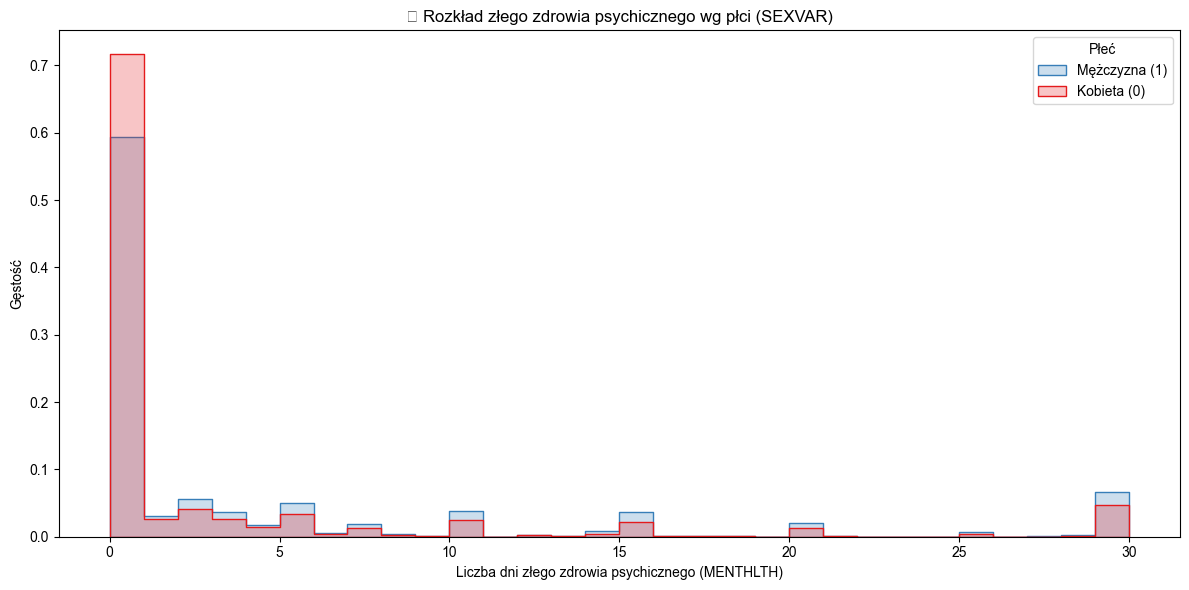

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Zakładamy, że zmienne są już oczyszczone (MENTHLTH numeryczna, bez 77/99/NaN)
df_plot = df.copy()
df_plot = df_plot.sort_values(by='MENTHLTH')


# Przygotowanie danych: usunięcie braków
df_plot = df[['MENTHLTH', 'SEXVAR']].dropna()

# Histogram: rozkład liczby dni złego samopoczucia wg płci
plt.figure(figsize=(12, 6))
sns.histplot(
    data=df_plot,
    x="MENTHLTH",
    hue="SEXVAR",
    bins=30,
    element="step",
    stat="density",
    common_norm=False,
    palette="Set1"
)

# Oś X i legenda
plt.xlabel("Liczba dni złego zdrowia psychicznego (MENTHLTH)")
plt.ylabel("Gęstość")
plt.title("🔍 Rozkład złego zdrowia psychicznego wg płci (SEXVAR)")
plt.legend(title="Płeć", labels=["Mężczyzna (1)", "Kobieta (0)"])
sns.set_style("whitegrid")
plt.tight_layout()
plt.show()



<Axes: xlabel='EDUCA', ylabel='MENTHLTH'>

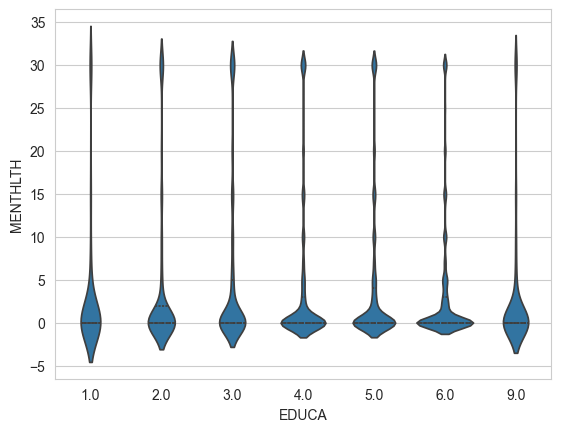

In [17]:
df_plot = df[['MENTHLTH', 'EDUCA']].dropna()
sns.violinplot(data=df_plot, x='EDUCA', y='MENTHLTH', inner='quartile')

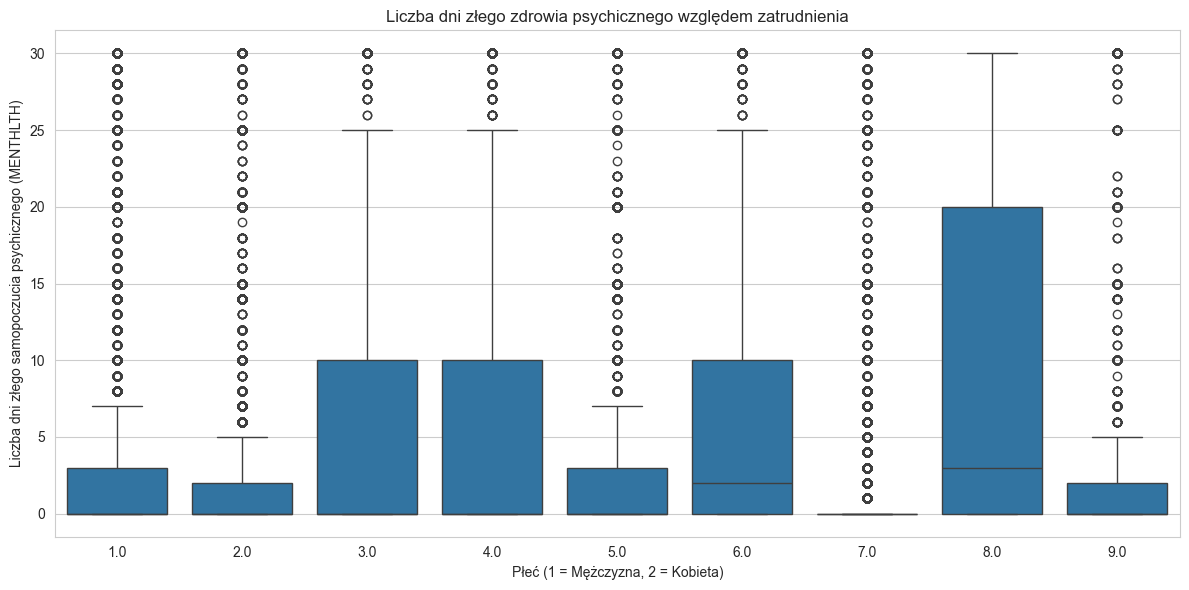

In [18]:
df_plot = df[['EMPLOY1', 'MENTHLTH']].dropna(subset=['EMPLOY1', 'MENTHLTH'])
plt.figure(figsize=(12, 6))
sns.boxplot(x='EMPLOY1', y='MENTHLTH', data=df_plot)

plt.title('Liczba dni złego zdrowia psychicznego względem zatrudnienia')
plt.xlabel('Płeć (1 = Mężczyzna, 2 = Kobieta)')
plt.ylabel('Liczba dni złego samopoczucia psychicznego (MENTHLTH)')
sns.set_style('whitegrid')
plt.tight_layout()
plt.show()

# 2. Selekcja zmiennych

# 2.1. Analiza ANOVA
ANOVA to test statystyczny używany do sprawdzenia, czy występują istotne różnice między średnimi trzech lub więcej grup, tj. analiza wariancji. Pomaga nam ustalić, czy zmiany w danych są spowodowane różnymi czynnikami (zdrowie, edukacja, itp).


Jest dobrym narzędziem do oceny związku między:

- zmienną zależną (predykcyjną) – czyli tym, co próbujesz przewidzieć (output, target), 
- a zmienną niezależną (wejściową) – czyli cechami wejściowymi (input features, explanatory variables). 

In [19]:
from scipy.stats import f_oneway
print(df.columns)
# Upewnij się, że brakujące wartości są poprawnie ustawione
df['MENTHLTH'] = df['MENTHLTH'].replace({77: pd.NA, 99: pd.NA})

# Lista zmiennych kandydujących: niskie zróżnicowanie → kategoryczne
exclude_cols = ['MENTHLTH']
categorical_cols = [
    col for col in df.columns 
    if col not in exclude_cols and df[col].nunique(dropna=True) <= 15
]

# Wyniki ANOVA
anova_results = []

for col in categorical_cols:
    try:
        data = df[[col, 'MENTHLTH']].dropna()
        groups = [grp['MENTHLTH'] for _, grp in data.groupby(col)]
        if len(groups) > 1:
            f_stat, p_val = f_oneway(*groups)
            anova_results.append({
                'Variable': col,
                'F-statistic': round(f_stat, 4),
                'p-value': round(p_val, 6),
                'N groups': len(groups)
            })
    except Exception as e:
        continue  # Pomija zmienne, które powodują błąd (np. same NaN)

# Posortuj wyniki po istotności
anova_df = pd.DataFrame(anova_results).sort_values(by='p-value')
significant_features = anova_df[anova_df['p-value'] < 0.05]['Variable'].tolist()
significant_features

Index(['_STATE', 'FMONTH', 'IMONTH', 'IDAY', 'IYEAR', 'SEXVAR', 'GENHLTH',
       'PHYSHLTH', 'MENTHLTH', 'HLTHPLN1',
       ...
       '_RFSMOK3', 'DRNKANY5', 'DROCDY3_', '_RFBING5', '_DRNKWK1', '_RFDRHV7',
       '_RFSEAT2', '_RFSEAT3', '_DRNKDRV', '_AIDTST4'],
      dtype='object', length=101)


['FMONTH',
 'IMONTH',
 'SEXVAR',
 'GENHLTH',
 'PERSDOC2',
 'HLTHPLN1',
 'MEDCOST',
 'CHECKUP1',
 'CVDSTRK3',
 'EXERANY2',
 'CVDINFR4',
 'CVDCRHD4',
 'CHCSCNCR',
 'ASTHMA3',
 'CHCOCNCR',
 'CHCCOPD2',
 'EDUCA',
 'HAVARTH4',
 'ADDEPEV3',
 'CHCKDNY2',
 'DIABETE4',
 'LASTDEN4',
 'RMVTETH4',
 'MARITAL',
 'EMPLOY1',
 'RENTHOM1',
 'CPDEMO1B',
 'VETERAN3',
 'DEAF',
 'INCOME2',
 'BLIND',
 'DECIDE',
 '_IMPRACE',
 'DIFFWALK',
 'DIFFDRES',
 'DIFFALON',
 'SMOKE100',
 'USENOW3',
 'FLUSHOT7',
 'PNEUVAC4',
 'SEATBELT',
 'HIVTST7',
 'HIVRISK5',
 'QSTVER',
 'QSTLANG',
 '_METSTAT',
 '_URBSTAT',
 '_RAWRAKE',
 '_LTASTH1',
 '_DUALUSE',
 '_RFHLTH',
 '_PHYS14D',
 '_MENT14D',
 '_HCVU651',
 '_TOTINDA',
 '_MICHD',
 '_EXTETH3',
 '_CASTHM1',
 '_ASTHMS1',
 '_DRDXAR2',
 '_PRACE1',
 '_DENVST3',
 '_MRACE1',
 '_RACE',
 '_DRNKDRV',
 '_RACEG21',
 '_RACEGR3',
 '_RACEPRV',
 '_AGEG5YR',
 '_SEX',
 '_AGE65YR',
 '_AGE_G',
 '_INCOMG',
 '_RFBMI5',
 '_CHLDCNT',
 '_EDUCAG',
 '_RFSMOK3',
 '_SMOKER3',
 'DRNKANY5',
 '_RFBING5',
 '_AID

In [20]:
df

,_STATE,FMONTH,IMONTH,IDAY,IYEAR,SEXVAR,GENHLTH,PHYSHLTH,MENTHLTH,HLTHPLN1,...,_RFSMOK3,DRNKANY5,DROCDY3_,_RFBING5,_DRNKWK1,_RFDRHV7,_RFSEAT2,_RFSEAT3,_DRNKDRV,_AIDTST4
0,1,1,1,4,2020,2,2.0,3.0,30.0,2.0,...,2,2,0,1,0,1,1,1,9,1.0
1,1,1,2,7,2020,2,3.0,88.0,0.0,1.0,...,9,9,900,9,99900,9,9,9,9,NaN
2,1,1,1,23,2020,2,3.0,88.0,0.0,1.0,...,1,2,0,1,0,1,1,1,9,2.0
3,1,1,1,9,2020,2,1.0,88.0,0.0,1.0,...,1,2,0,1,0,1,1,1,9,2.0
4,1,1,1,4,2020,2,2.0,88.0,0.0,1.0,...,1,2,0,1,0,1,1,1,9,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401953,72,11,2,19,2021,2,3.0,88.0,0.0,2.0,...,1,2,0,1,0,1,1,1,9,1.0
401954,72,11,2,14,2021,2,3.0,88.0,0.0,1.0,...,1,2,0,1,0,1,1,1,9,1.0
401955,72,11,2,14,2021,2,3.0,88.0,0.0,1.0,...,1,2,0,1,0,1,1,1,9,2.0
401956,72,11,3,17,2021,1,3.0,88.0,0.0,1.0,...,9,1,14,1,200,1,1,1,2,1.0


In [21]:
from scipy.stats import f_oneway

anova_results = {}
for col in categorical_cols:
    try:
        groups = []
        for val in df[col].dropna().unique():
            group = df[df[col] == val]["MENTHLTH"].dropna()
            if len(group) > 1:
                groups.append(group)

        # print(f"Column: {col}, Groups: {len(groups)}")  # Debugging
        if len(groups) > 1:
            stat, p = f_oneway(*groups)
            anova_results[col] = p
    except Exception as e:
        print(f"Błąd dla kolumny {col}: {e}")
        continue

# Wyświetl posortowane wyniki p-value
sorted_anova = sorted(anova_results.items(), key=lambda x: x[1])
significant_features = [k for k, v in sorted_anova if v < 0.05]
print(significant_features)


['SEXVAR', 'GENHLTH', 'MEDCOST', 'EXERANY2', 'ASTHMA3', 'CHCCOPD2', 'HAVARTH4', 'ADDEPEV3', 'LASTDEN4', 'RMVTETH4', 'MARITAL', 'EDUCA', 'RENTHOM1', 'EMPLOY1', 'INCOME2', 'BLIND', 'DECIDE', 'DIFFWALK', 'DIFFDRES', 'DIFFALON', 'SMOKE100', 'HIVTST7', 'HIVRISK5', 'QSTVER', '_RAWRAKE', '_DUALUSE', '_RFHLTH', '_PHYS14D', '_MENT14D', '_HCVU651', '_TOTINDA', '_LTASTH1', '_CASTHM1', '_ASTHMS1', '_DRDXAR2', '_DENVST3', '_SEX', '_AGEG5YR', '_AGE65YR', '_AGE_G', '_EDUCAG', '_INCOMG', '_SMOKER3', '_RFSMOK3', '_AIDTST4', '_RFBING5', '_MRACE1', 'CVDSTRK3', '_RFDRHV7', '_RACEPRV', '_RACE', '_IMPRACE', '_CHLDCNT', '_PRACE1', 'CHCKDNY2', 'PERSDOC2', 'HLTHPLN1', 'IMONTH', 'DIABETE4', 'VETERAN3', '_RACEGR3', '_EXTETH3', 'PNEUVAC4', 'CHECKUP1', 'FLUSHOT7', 'FMONTH', 'CHCSCNCR', '_MICHD', 'DEAF', 'SEATBELT', '_RFSEAT2', 'CVDINFR4', 'CVDCRHD4', '_RFSEAT3', 'QSTLANG', 'CPDEMO1B', '_DRNKDRV', 'CHCOCNCR', '_URBSTAT', '_RACEG21', '_METSTAT', '_RFBMI5', 'DRNKANY5', 'USENOW3', '_HISPANC']


In [22]:
if 'MENTHLTH' not in significant_features:
    significant_features.append('MENTHLTH')
df = df[significant_features]

In [23]:
df.isnull().sum().sort_values(ascending=False)

HIVRISK5    35670
HIVTST7     33786
_AIDTST4    33786
SEATBELT    25314
PNEUVAC4    24251
            ...  
_RFSEAT3        0
_RFSEAT2        0
_RFBMI5         0
DRNKANY5        0
_HISPANC        0
Length: 86, dtype: int64

In [24]:
df = df.dropna()

# 3. Podsumowanie czyszczenia danych 

In [25]:
print("🧼 Podsumowanie danych po czyszczeniu:")
print("Liczba rekordów:", df.shape[0])
print("Liczba kolumn:", df.shape[1])
print("Liczba braków:", df.isna().sum().sum())
print("Średnia wartość MENTHLTH:", df['MENTHLTH'].mean())
print("Mediana MENTHLTH:", df['MENTHLTH'].median())

🧼 Podsumowanie danych po czyszczeniu:
Liczba rekordów: 346604
Liczba kolumn: 86
Liczba braków: 0
Średnia wartość MENTHLTH: 3.9175976041822946
Mediana MENTHLTH: 0.0


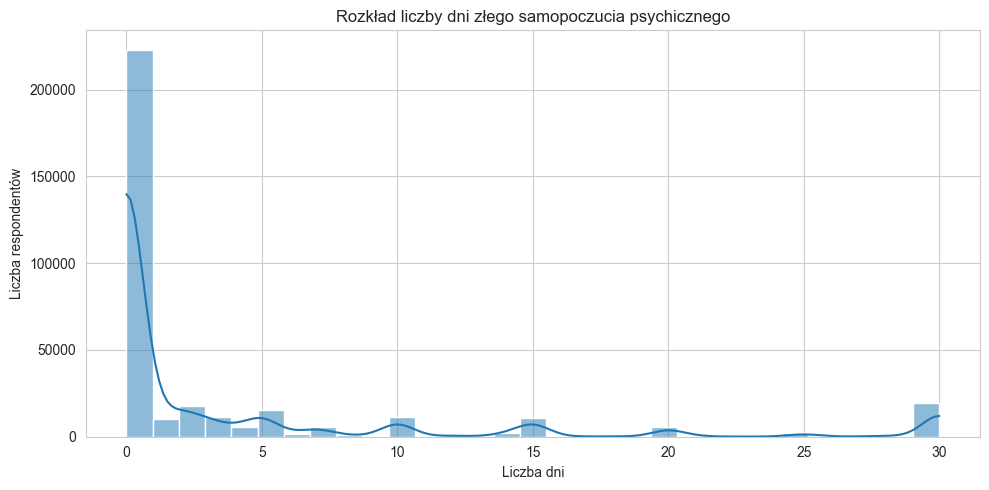

In [26]:
# Histogram zmiennej docelowej
plt.figure(figsize=(10, 5))
sns.histplot(df['MENTHLTH'], bins=31, kde=True)
plt.title('Rozkład liczby dni złego samopoczucia psychicznego')
plt.xlabel('Liczba dni')
plt.ylabel('Liczba respondentów')
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\adamw\AppData\Local\Temp\ipykernel_39576\1068489988.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corr.values, y=top_corr.index, palette='coolwarm')


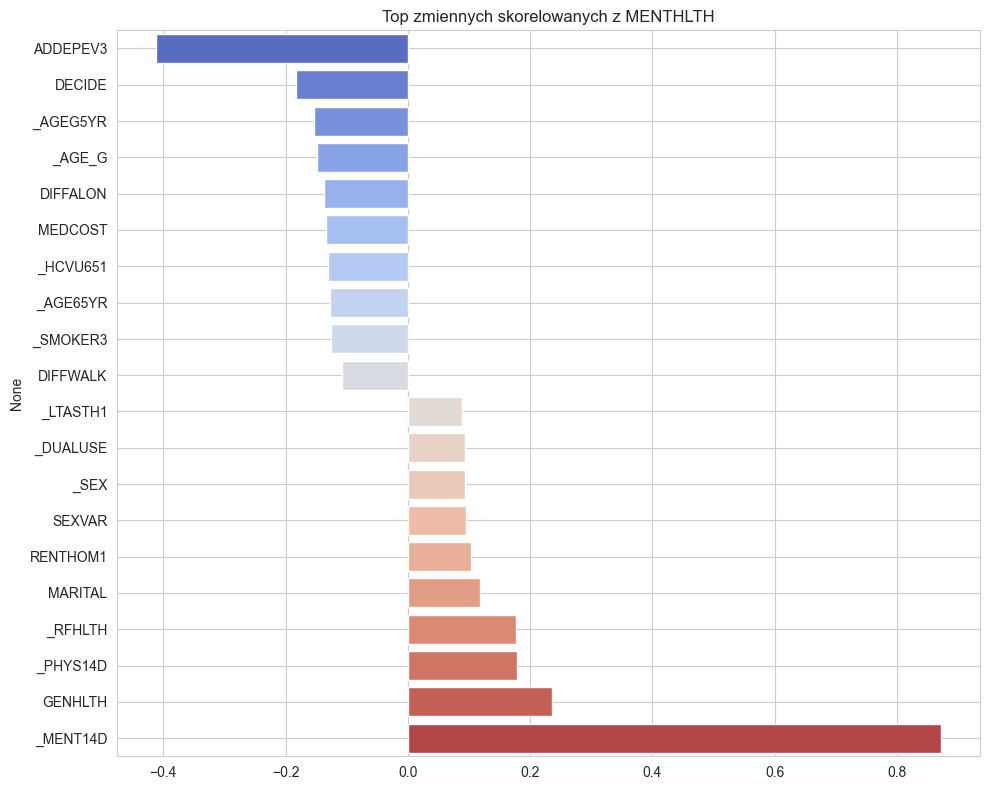

In [27]:
# Korelacje z MENTHLTH
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('MENTHLTH')
correlations = df[numerical_cols].corrwith(df['MENTHLTH']).sort_values()
top_corr = pd.concat([correlations.head(10), correlations.tail(10)])

plt.figure(figsize=(10, 8))
sns.barplot(x=top_corr.values, y=top_corr.index, palette='coolwarm')
plt.title('Top zmiennych skorelowanych z MENTHLTH')
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Tworzenie Modeli

## 4.1. Przygotowanie do modelowania 

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error, mean_squared_error

In [29]:
# Zdefiniowanie zmiennej zależnej i predyktorów
X = df.drop(columns='MENTHLTH')
y = df['MENTHLTH']

In [30]:
# Automatyczne wykrycie zmiennych kategorycznych
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_features += [
    col for col in X.columns
    if X[col].nunique() <= 10 and X[col].dtype in ['int64', 'float64']
]
categorical_features = list(set(categorical_features))
numerical_features = [col for col in X.columns if col not in categorical_features]

In [31]:
# Pipeline do transformacji danych
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numerical_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
        ]), categorical_features)
    ]
)

## 4.2. Tworzenie modeli 

In [32]:
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),
    'Neural Network': MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
}

## 4.3. Podział danych do walidacji krzyżowej 

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4.4. Trening modeli

In [ ]:
# Trening i ocena modeli
# for name, model in models.items():
#     pipe = Pipeline([
#         ('preprocessor', preprocessor),
#         ('model', model)
#     ])
#     pipe.fit(X_train, y_train)
#     preds = pipe.predict(X_test)
#     print(f"\n📊 Wyniki dla modelu: {name}")
#     print("R² score:", round(r2_score(y_test, preds), 3))
#     print("RMSE:", round(root_mean_squared_error(y_test, preds), 3))


📊 Wyniki dla modelu: Random Forest
R² score: 0.889
RMSE: 2.666

📊 Wyniki dla modelu: Neural Network
R² score: 0.835
RMSE: 3.242


In [1]:
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Inicjalizacja
# Ponowna definicja z poprawką
results = []
for name, model in models.items():
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)

    r2 = r2_score(y_test, preds)
    rmse = root_mean_squared_error(y_test, preds, squared=False)  # zamiast root_mean_squared_error
    mae = mean_absolute_error(y_test, preds)

    results.append({
        'Model': name,
        'R2': round(r2, 3),
        'RMSE': round(rmse, 3),
        'MAE': round(mae, 3)
    })

    # Wykresy
    plt.figure(figsize=(6, 5))
    sns.scatterplot(x=y_test, y=preds, alpha=0.5)
    plt.plot([0, 30], [0, 30], '--', color='black')
    plt.title(f'{name} – Predykcja vs Rzeczywiste')
    plt.xlabel('Rzeczywiste MENTHLTH')
    plt.ylabel('Predykcja')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    residuals = y_test - preds
    plt.figure(figsize=(6, 5))
    sns.histplot(residuals, bins=30, kde=True, color='tomato')
    plt.axvline(0, color='black', linestyle='--')
    plt.title(f'{name} – Rozkład residuali')
    plt.xlabel('Błąd predykcji')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Wyświetlenie tabeli wyników
results_df = pd.DataFrame(results)

NameError: name 'models' is not defined